In [9]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import cv2

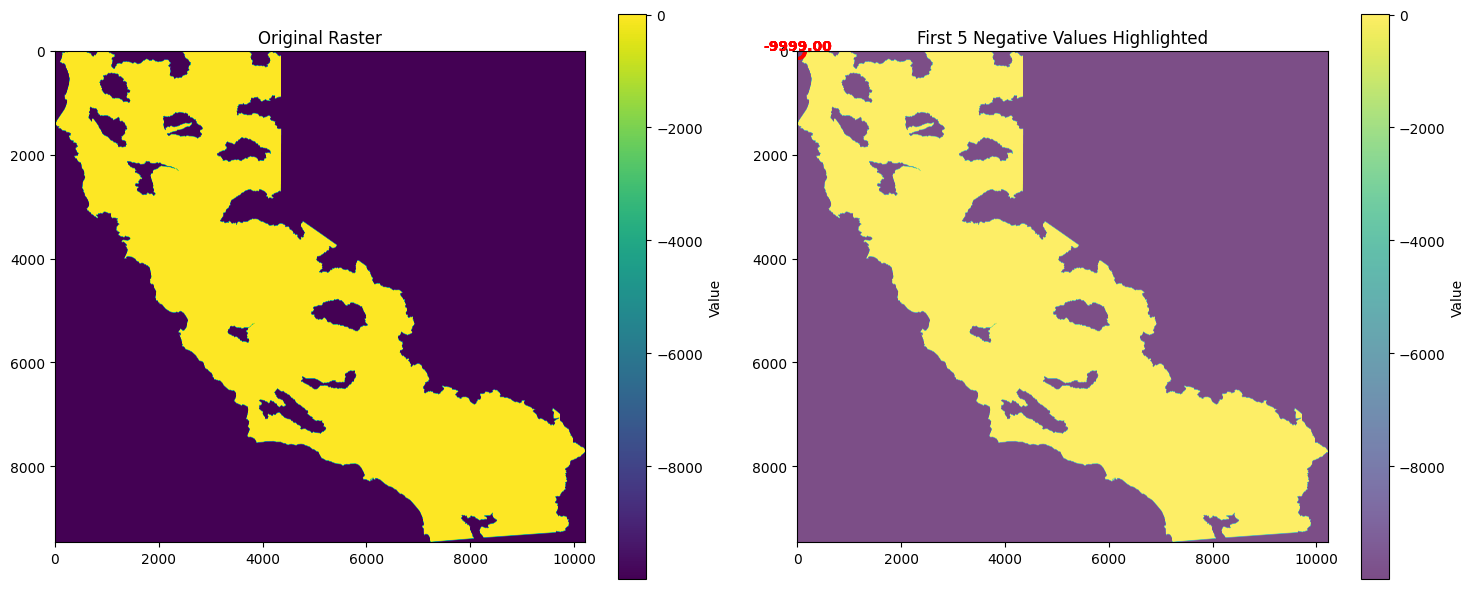

First 5 Negative Values:
Location (y, x): (0, 0), Value: -9999.0
Location (y, x): (0, 1), Value: -9999.0
Location (y, x): (0, 2), Value: -9999.0
Location (y, x): (0, 3), Value: -9999.0
Location (y, x): (0, 4), Value: -9999.0


In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def highlight_first_5_negative_values(raster_path):
    """
    Read a raster and create a visualization highlighting the first 5 negative values.
    
    Parameters:
    -----------
    raster_path : str
        Path to the input raster file
    
    Returns:
    --------
    tuple
        A tuple containing:
        - Original raster data as a numpy array
        - Coordinates of the first 5 negative values
    """
    # Read the raster
    with rasterio.open(raster_path) as src:
        # Read the first band
        raster_data = src.read(1)
        
        # Create a mask of negative values
        negative_mask = raster_data < 0
        
        # Find coordinates of negative values
        negative_coords = np.column_stack(np.where(negative_mask))
        
        # Take only the first 5 negative value locations
        first_5_negative_coords = negative_coords[:5]
        
        # Visualize the raster with first 5 negative values
        plt.figure(figsize=(15, 6))
        
        # Original data subplot
        plt.subplot(121)
        plt.title('Original Raster')
        im1 = plt.imshow(raster_data, cmap='viridis')
        plt.colorbar(im1, label='Value')
        
        # First 5 negative values subplot
        plt.subplot(122)
        plt.title('First 5 Negative Values Highlighted')
        
        # Plot the base raster
        im2 = plt.imshow(raster_data, cmap='viridis', alpha=0.7)
        plt.colorbar(im2, label='Value')
        
        # Draw circles around first 5 negative value locations
        for y, x in first_5_negative_coords:
            # Draw a red circle
            plt.plot(x, y, 'ro', markersize=10, markerfacecolor='none', markeredgewidth=2)
            # Annotate with the value
            plt.text(x, y-10, f'{raster_data[y, x]:.2f}', color='red', 
                     fontweight='bold', ha='center')
        
        plt.tight_layout()
        plt.show()
        
        # Print information about the first 5 negative values
        print("First 5 Negative Values:")
        for y, x in first_5_negative_coords:
            print(f"Location (y, x): ({y}, {x}), Value: {raster_data[y, x]}")
        
        return raster_data, first_5_negative_coords

# Example usage
raster_data, first_5_negative_coords = highlight_first_5_negative_values(
    '/home/ciom/workspace/pfas_map_ml/data/process/filtered_Active_Solid_Waste_Facilities.tiff'
)